In [1]:
import sys; sys.path.insert(0, '../'); sys.path.insert(0, 'analysis_notes/mupClassification/'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
%matplotlib inline

# afro' GENIE samples - mimicking the detector volume

In [2]:
genie = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/mA/afro_genie_samples/CC_100k_mA_0.99.csv')
len(genie)

100000

In [3]:
cc1p0pi = genie[genie.IsCC_1p_200MeVc_0pi == True]
print len(cc1p0pi),'cc1p0pi'
cc1p0pi_length_cut = cc1p0pi[cc1p0pi.reco_l_mu > cc1p0pi.reco_l_p]
print len(cc1p0pi_length_cut),'cc1p0pi with l(µ)>l(p) cut'

34849 cc1p0pi
30295 cc1p0pi with l(µ)>l(p) cut


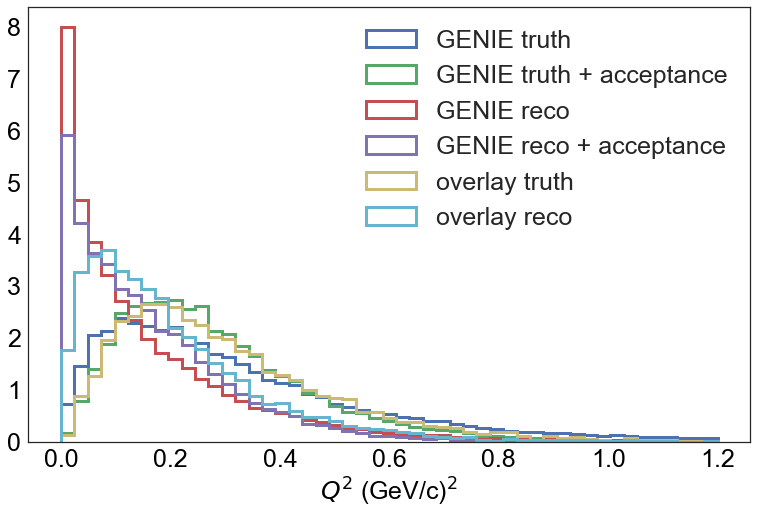

In [18]:
fig=plt.figure(figsize=(12.944,8))
ax=fig.add_subplot(1,1,1)
bins=linspace(0,1.2,50)
plt.hist(cc1p0pi_length_cut['Q2'],bins=bins,histtype='step',linewidth=3,label='GENIE truth',normed=1)
plt.hist(cc1p0pi_length_cut['Q2'],weights=cc1p0pi_length_cut['MicroBooNEWeight_Pmu_theta_Pp_theta'],bins=bins,histtype='step',linewidth=3,label='GENIE truth + acceptance',normed=1)
plt.hist(cc1p0pi_length_cut['reco_Q2'],bins=bins,histtype='step',linewidth=3,label='GENIE reco',normed=1)
plt.hist(cc1p0pi_length_cut['reco_Q2'],weights=cc1p0pi_length_cut['MicroBooNEWeight_Pmu_theta_Pp_theta'],bins=bins,histtype='step',linewidth=3,label='GENIE reco + acceptance',normed=1)

overlay_CC1p0pi=pd.read_csv('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/SelectedEvents/selected_cc1p0pi.csv')
plt.hist(overlay_CC1p0pi['truth_Q2'],bins=bins,histtype='step',linewidth=3,label='overlay truth',normed=1)
plt.hist(overlay_CC1p0pi['reco_Q2'],bins=bins,histtype='step',linewidth=3,label='overlay reco',normed=1)

set_axes(ax,r'$Q^2$ (GeV/c)$^2$',do_add_legend=True)

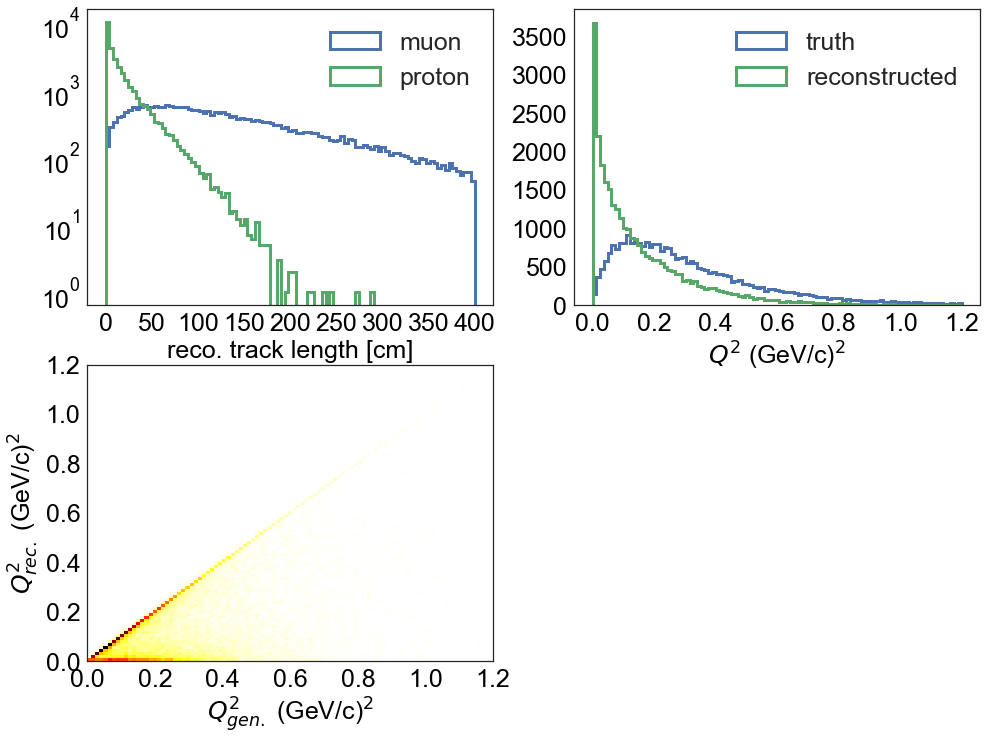

In [4]:
fig=plt.figure(figsize=(16,12))
ax=fig.add_subplot(2,2,1)
for particle,plabel in zip(['mu','p'],['muon','proton']):
    plt.hist(cc1p0pi_length_cut['reco_l_'+particle],bins=linspace(0,400,100),histtype='step',linewidth=3,label=plabel)
set_axes(ax,r'reco. track length [cm]',do_add_legend=True)
ax.set_yscale('log')

ax=fig.add_subplot(2,2,2)
plt.hist(cc1p0pi_length_cut['Q2'],bins=linspace(0,1.2,100),histtype='step',linewidth=3,label='truth')
plt.hist(cc1p0pi_length_cut['reco_Q2'],bins=linspace(0,1.2,100),histtype='step',linewidth=3,label='reconstructed')
set_axes(ax,r'$Q^2$ (GeV/c)$^2$',do_add_legend=True)


ax=fig.add_subplot(2,2,3)
plot_2d_hist(cc1p0pi_length_cut['Q2'],cc1p0pi_length_cut['reco_Q2'],bins=linspace(0,1.2,100)
             ,xlabel=r'$Q^2_{gen.}$ (GeV/c)$^2$',ylabel=r'$Q^2_{rec.}$ (GeV/c)$^2$',ax=ax);

# event weight

In [2]:
ovrelay = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates//prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_06_21_vertices.csv')
genie = pd.read_csv('/Users/erezcohen/Desktop/Temporary/prodgenie_bnb_nu_uboone_overlay_mcc8.11_genie.csv')

In [3]:
overlay_genie_CC1p0pi=genie[genie['IsCC_1p_200MeVc_0pi']==True]

In [4]:
mup = ovrelay[ovrelay['1mu-1p']==True]

170 mA= 0.4 with weight=1
680 mA= 0.4 with weight!=1
170 mA= 0.7 with weight=1
680 mA= 0.7 with weight!=1
850 mA= 0.99 with weight=1
0 mA= 0.99 with weight!=1
172 mA= 1.35 with weight=1
678 mA= 1.35 with weight!=1
172 mA= 1.71 with weight=1
678 mA= 1.71 with weight!=1


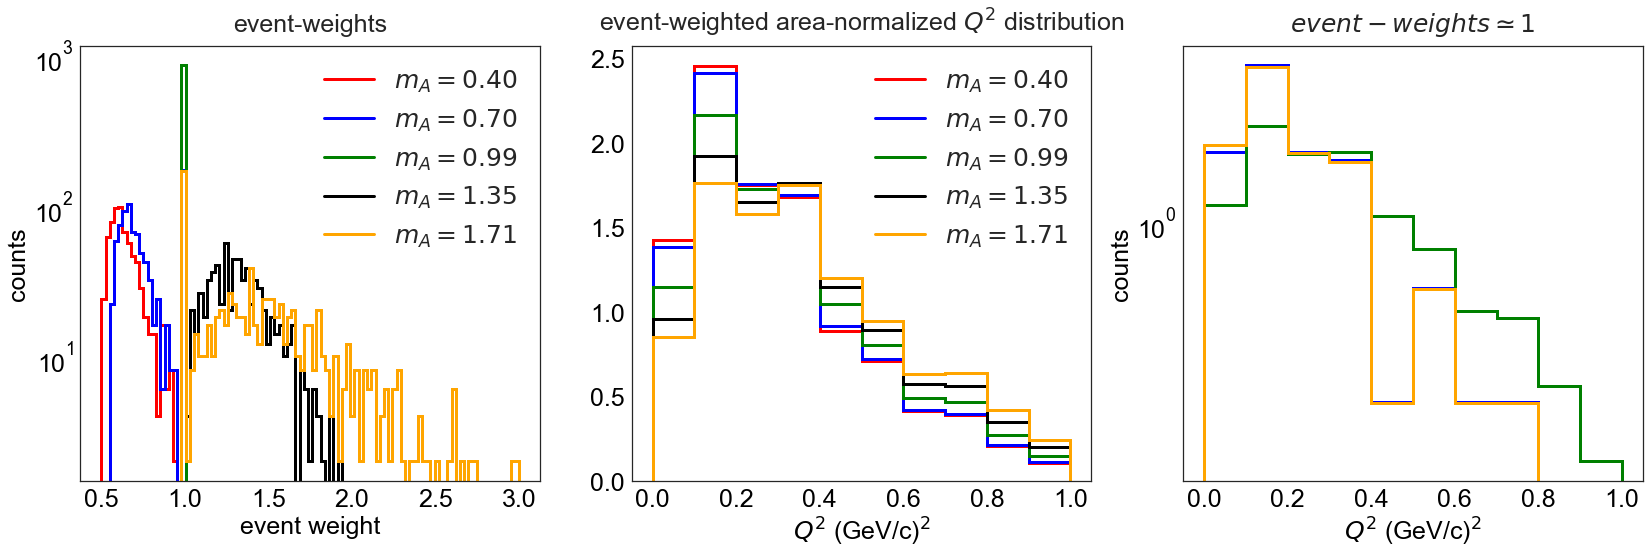

In [15]:
fig=plt.figure(figsize=(28,8))

ax=fig.add_subplot(1,3,1)
bins=linspace(0.5,3,100)
x_label=r'$Q^2$ (GeV/c)$^2$'
ones = dict()
for mA,name,color in zip([0.40,0.70,0.99,1.35,1.71]
                   ,['040','070','099','135','171']
                         ,['red','blue','green','black','orange']):
    ones[mA] = overlay_genie_CC1p0pi[np.abs(overlay_genie_CC1p0pi['evwgh_mA'+name+'_Genie']-1)<0.01]
    print len(ones[mA]),'mA=',mA,'with weight=1'
    print len(overlay_genie_CC1p0pi[np.abs(overlay_genie_CC1p0pi['evwgh_mA'+name+'_Genie']-1)>0.01]),'mA=',mA,'with weight!=1'

    plt.hist(overlay_genie_CC1p0pi['evwgh_mA'+name+'_Genie'],bins=bins,histtype='step'
             ,linewidth=3#,normed=1
             ,label=None,color=color);
    plt.plot([0.5,0.5],[0,0],linewidth=3,color=color,label='$m_A=%.2f$'%mA)
set_axes(ax,'event weight','counts',do_add_legend=True,title='event-weights')
ax.set_yscale('log')


ax=fig.add_subplot(1,3,2)
bins=linspace(0,1,11)
x_label=r'$Q^2$ (GeV/c)$^2$'
for mA,name,color in zip([0.40,0.70,0.99,1.35,1.71]
                   ,['040','070','099','135','171']
                         ,['red','blue','green','black','orange']):
    plt.hist(overlay_genie_CC1p0pi['truth_Q2'],weights=overlay_genie_CC1p0pi['evwgh_mA'+name+'_Genie'],bins=bins,histtype='step'
             ,linewidth=3,normed=1
             ,label=None,color=color);
    plt.plot([0,0],[0,0],linewidth=3,color=color,label='$m_A=%.2f$'%mA)
set_axes(ax,x_label,'',do_add_grid=False,alpha_grid=1,do_add_legend=True,title='event-weighted area-normalized $Q^2$ distribution')




ax=fig.add_subplot(1,3,3)
for mA,name,color in zip([0.40,0.70,0.99,1.35,1.71]
                         ,['040','070','099','135','171']
                         ,['red','blue','green','black','orange']):
    plt.hist(ones[mA]['truth_Q2'],bins=bins,histtype='step'
             ,linewidth=3,normed=1
             ,label=None,color=color);
    plt.plot([0.5,0.5],[0,0],linewidth=3,color=color,label='$m_A=%.2f$'%mA)
set_axes(ax,x_label,'counts',do_add_legend=False,title='$event-weights\simeq 1$')
ax.set_yscale('log')

# GENIE samples

In [5]:
mA_array = [0.80,0.90,0.99,1.10,1.20,1.40]
genie_CC1p0pi = dict()
for mA in mA_array:
    genie_sample = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/mA/afro_genie_samples/CC_100k_mA_%.2f.csv'%mA)
    genie_CC1p0pi[mA] = genie_sample[genie_sample['IsCC_1p_200MeVc_0pi']==True]
    print len(genie_CC1p0pi[mA]),'CC1p0π events in GENIE samples with mA=%.2f'%mA

32163 CC1p0π events in GENIE samples with mA=0.80
33824 CC1p0π events in GENIE samples with mA=0.90
34849 CC1p0π events in GENIE samples with mA=0.99
36196 CC1p0π events in GENIE samples with mA=1.10
37239 CC1p0π events in GENIE samples with mA=1.20
38810 CC1p0π events in GENIE samples with mA=1.40


KeyError: 'evwgh_mA040'

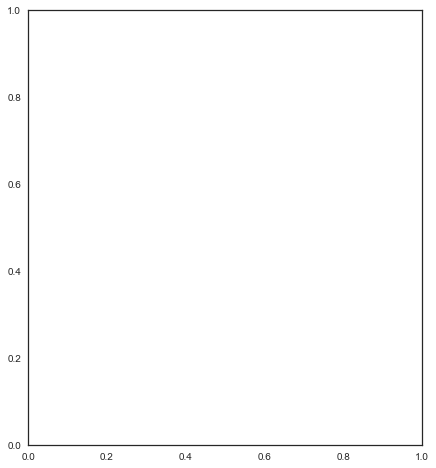

In [14]:
fig=plt.figure(figsize=(24,8))
ax=fig.add_subplot(1,3,1)
bins=linspace(0,1,21)
x_label=r'$Q^2$ (GeV/c)$^2$'
# plt.hist(overlay_genie_CC1p0pi['truth_Q2'],bins=bins,histtype='step'
#              ,linewidth=3#,normed=1
#              ,label='default',color='yellow');

for mA,name,color in zip([0.40,0.70,0.99,1.35,1.71]
                   ,['040','070','099','135','171']
                         ,['red','blue','green','black','orange']):
    plt.hist(overlay_genie_CC1p0pi['truth_Q2'],weights=overlay_genie_CC1p0pi['evwgh_mA'+name],bins=bins,histtype='step'
             ,linewidth=3#,normed=1
             ,label=None,color=color);
    plt.plot([0,0],[0,0],linewidth=3,color=color,label='$m_A=%.2f$'%mA)
set_axes(ax,x_label,'',do_add_grid=True,alpha_grid=1,do_add_legend=True,title='using event-weight on the same overlay')


ax=fig.add_subplot(1,3,2)
bins=linspace(0,1,21)
for mA,color in zip(mA_array
                    ,['red','blue','green','black','orange']):
    Q2 = genie_CC1p0pi[mA]['Q2']
    plt.hist(Q2,bins=bins,histtype='step',linewidth=3#,normed=1
             ,label=None,color=color);
    plt.plot([0,0],[0,0],linewidth=3,color=color,label='$m_A=%.2f$'%mA)
set_axes(ax,x_label,'',do_add_grid=True,alpha_grid=1,do_add_legend=True,title='GENIE samples (no detector)')


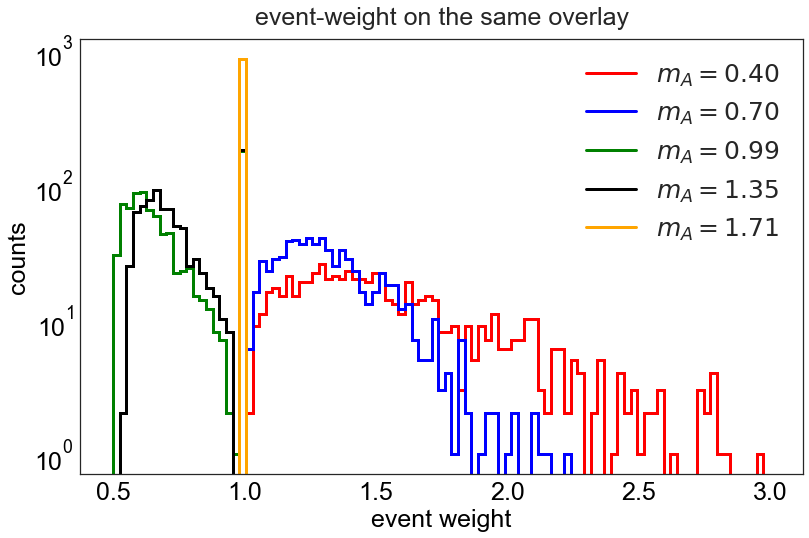

In [18]:
fig=plt.figure(figsize=(12.944,8))
ax=fig.add_subplot(1,1,1)
bins=linspace(0.5,3,100)
x_label=r'$Q^2$ (GeV/c)$^2$'
for mA,name,color in zip([0.40,0.70,0.99,1.35,1.71]
                   ,['040','070','099','135','171']
                         ,['red','blue','green','black','orange']):
    plt.hist(overlay_genie_CC1p0pi['evwgh_mA'+name],bins=bins,histtype='step'
             ,linewidth=3#,normed=1
             ,label=None,color=color);
    plt.plot([0.5,0.5],[0,0],linewidth=3,color=color,label='$m_A=%.2f$'%mA)
set_axes(ax,'event weight','counts',do_add_legend=True,title='event-weight on the same overlay')
ax.set_yscale('log')